In [1]:
import numpy as np

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_40220635570a4ded8b73463bcdb8fd37 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_CScW2z1y4Hgf9cgDbq5lqoIUir3varG2aD1dEfjlon7',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_40220635570a4ded8b73463bcdb8fd37.get_object(Bucket='winequality-donotdelete-pr-wyh4v7qptgw5c3',Key='winequality-white.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
df['Reviews'] = reviews

In [5]:
x = df.iloc[:,:11].values
y = df['Reviews'].values

In [6]:
x

array([[  7.  ,   0.27,   0.36, ...,   3.  ,   0.45,   8.8 ],
       [  6.3 ,   0.3 ,   0.34, ...,   3.3 ,   0.49,   9.5 ],
       [  8.1 ,   0.28,   0.4 , ...,   3.26,   0.44,  10.1 ],
       ..., 
       [  6.5 ,   0.24,   0.19, ...,   2.99,   0.46,   9.4 ],
       [  5.5 ,   0.29,   0.3 , ...,   3.34,   0.38,  12.8 ],
       [  6.  ,   0.21,   0.38, ...,   3.26,   0.32,  11.8 ]])

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

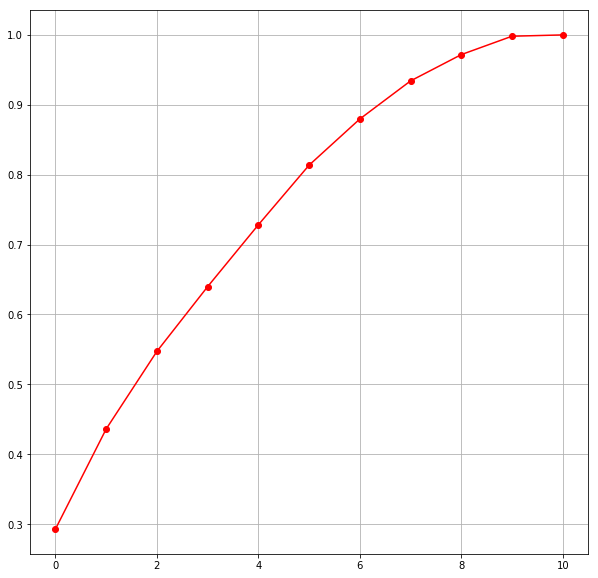

In [9]:
#plot the graph to find the principal components
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [10]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

# logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [13]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[   0    3    0]
 [   0 1167    0]
 [   0   55    0]]
95.2653061224


# decision tree classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [15]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[   0    3    0]
 [   3 1132   32]
 [   0   34   21]]
94.1224489796


# NaiveBayes

In [16]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)

In [17]:
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[   1    2    0]
 [  13 1153    1]
 [   0   55    0]]
94.2040816327


# random forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [20]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[   0    3    0]
 [   0 1166    1]
 [   0   43   12]]
96.1632653061


# svm

In [21]:
from sklearn.svm import SVC


In [22]:
rbf_svc = SVC()
rbf_svc.fit(x_train, y_train)
rbf_svc
rbf_predict=rf.predict(x_test)
rbf_svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rbf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rbf_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[   0    3    0]
 [   0 1166    1]
 [   0   43   12]]
96.1632653061


In [24]:
lin_svc = SVC(kernel='linear')
lin_svc.fit(x_train, y_train)
lin_predict=rf.predict(x_test)

In [25]:
lin_svc_conf_matrix = confusion_matrix(y_test, lin_predict)
lin_svc_acc_score = accuracy_score(y_test, lin_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[   0    3    0]
 [   0 1166    1]
 [   0   43   12]]
96.1632653061


# using pipeline to implement the model

In [26]:
from sklearn.pipeline import make_pipeline

In [27]:
x = df.iloc[:,:11]

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
final_model=make_pipeline(StandardScaler(),PCA(8),RandomForestClassifier())

In [30]:
final_model.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, cri...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [31]:
predict=final_model.predict(X_test)

In [32]:
acc_score = accuracy_score(Y_test,predict)

In [33]:
acc_score

0.97244897959183674

In [35]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-06-04 13:29:18,456 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [36]:
wml_credentials={
     "instance_id": "10f2d21d-4849-494c-9752-3e3c3a18f2bd",
  "password": "4a09a9d1-fdd9-46d4-bfc4-efb614517596",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "3c2e2c1c-e71d-4319-904b-c9cf0d352e5e",
    "access_key" : "rFrkLSJw4iGvWB4NH9BMN9c60fbbnjeuyWJOafPhogSX"
}

In [37]:
client = WatsonMachineLearningAPIClient(wml_credentials)


In [38]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "saveera reddy",
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "saveerareddy123@gmail.com",
               client.repository.ModelMetaNames.NAME: "make_pipeline"}

In [39]:
model_artifact = client.repository.store_model(final_model, meta_props = model_props)

In [40]:
model_uid = client.repository.get_model_uid(model_artifact)

In [41]:
model_deployment_details = client.deployments.create(artifact_uid = model_uid, names = "deployment")



#######################################################################################

Synchronous deployment creation for uid: '81b2b8f0-7170-42cf-8225-53b781729531' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='93edd7f0-4f76-4545-b704-da58d6bb70a0'
------------------------------------------------------------------------------------------------




In [42]:
scoring_endpoint = client.deployments.get_scoring_url(model_deployment_details)


In [43]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/10f2d21d-4849-494c-9752-3e3c3a18f2bd/deployments/93edd7f0-4f76-4545-b704-da58d6bb70a0/online'